# Pharmocokinetic single compartment multi-dosage model

tau - Time interval between doses

number_dose_simulated - Number of ADDITIONAL doses administered

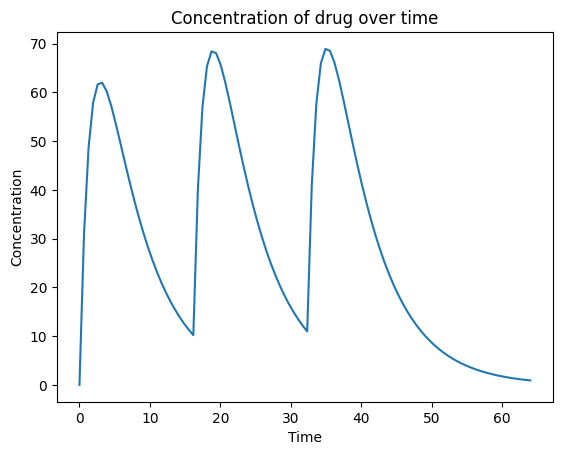

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np

#Dosing interval
tau=16 # @param {"type":"slider","min":8,"max":48,"step":8}

#Number of doses simulated
number_dose_simulated=2 # @param {"type":"slider","min":1,"max":5,"step":1}

dose = 100 # @param {"type":"slider","min":25,"max":200,"step":25}

#Volume of distribution
Vd = 2 # @param {"type":"slider","min":0.1,"max":20,"step":0.1}


#Absorption rate constant
ka = 0.61 # @param {"type":"slider","min":0.01,"max":1,"step":0.05}

#Distribution/elimination rate constant
ke = 0.16 # @param {"type":"slider","min":0.01,"max":1,"step":0.05}

#Excretion rate constant
k = 0.51   # @param {"type":"slider","min":0.01,"max":1,"step":0.05}

# tmax=38 # @param {"type":"slider","min":0,"max":100,"step":1}
tmax=tau*(number_dose_simulated+2)
N_t=100
time=np.linspace(0,tmax,N_t)
N_tau=int((tau*N_t)/tmax)

#Calculate absorption rate
A = dose * (1 - np.exp(-ka * time))

# Calculate concentration in plasma (distribution)
C_d = (dose / Vd) * np.exp(-ke * time)

# Calculate the concentration of the medicine (metabolism)
C_m = (dose * ka / (ka - k)) * (np.exp(-k * time) - np.exp(-ka * time))

# Calculate the concentration with excretion
C_e = dose * np.exp(-k * time)

#Cumulative graph
C_m_total = C_m
C_z_0= np.zeros(N_tau)
for i in range(number_dose_simulated):
  C_z= np.zeros(N_tau*(i+1))
  C_m_total= np.append(C_m_total,C_z_0) + np.insert(C_m,0,C_z)

plt.plot(time,C_m_total[0:N_t], linestyle="-")
plt.title("Concentration of drug over time")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

